In [1]:
import pandas as pd

player_data = "nba_2017_players_with_salary_wiki_twitter.csv"
df = pd.read_csv(player_data)
df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


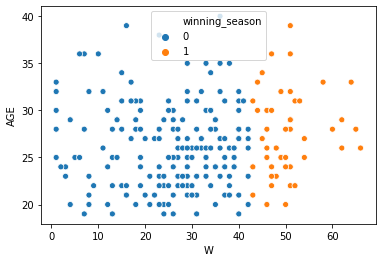

In [2]:
def winning_season(wins):
  
  if wins > 42:
      return 1
  return 0

df["winning_season"] = df["W"].apply(winning_season)

import seaborn as sns
sns.scatterplot(x="W", y="AGE", hue="winning_season", data=df)

#### Predict Winning Season

In [3]:
df2 = df[["AGE", "POINTS", "SALARY_MILLIONS", "PAGEVIEWS", "TWITTER_FAVORITE_COUNT","winning_season", "TOV"]]
df = df2.dropna()
target = df["winning_season"]
features = df[["AGE", "POINTS","SALARY_MILLIONS", "PAGEVIEWS", "TWITTER_FAVORITE_COUNT", "TOV"]]
classes = ["winning", "losing"]

In [4]:
df2.shape

(239, 7)

#### Use the Feature To Predict a Winning Season

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [7]:
# 1. Split the data into training and testing sets
# test_size=0.3 means 30% of data for testing, random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")
print("-" * 30)

Training features shape: (165, 6)
Testing features shape: (71, 6)
Training target shape: (165,)
Testing target shape: (71,)
------------------------------


In [8]:
# 2. Initialize and train a classification model (Logistic Regression in this example)
model = LogisticRegression(max_iter=1000, solver='liblinear') # Increased max_iter for convergence, liblinear for small datasets
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")
print("-" * 30)

Training the Logistic Regression model...
Model training complete.
------------------------------


In [9]:
# 3. Make predictions on the test set
print("Making predictions on the test set...")
y_pred = model.predict(X_test)
print("Predictions made.")
print("-" * 30)

Making predictions on the test set...
Predictions made.
------------------------------


In [10]:
# 4. Evaluate the model's performance
print("\nModel Evaluation:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Model Evaluation:
Accuracy: 0.7887


In [11]:
# Display classification report for more detailed metrics (Precision, Recall, F1-Score)
# 'target_names' are the labels for your 'winning_season' categories, e.g., 'winning', 'losing'
# Ensure 'classes' variable is defined as in the notebook (e.g., classes = ["winning", "losing"])
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

print("-" * 30)
print("Prediction on first 5 test samples vs actual:")
for i in range(5):
    print(f"Predicted: {classes[y_pred.iloc[i]] if isinstance(y_pred, pd.Series) else classes[y_pred[i]]}, Actual: {classes[y_test.iloc[i]] if isinstance(y_test, pd.Series) else classes[y_test[i]]}")


Classification Report:
              precision    recall  f1-score   support

     winning       0.80      0.98      0.88        56
      losing       0.50      0.07      0.12        15

    accuracy                           0.79        71
   macro avg       0.65      0.52      0.50        71
weighted avg       0.73      0.79      0.72        71

------------------------------
Prediction on first 5 test samples vs actual:
Predicted: winning, Actual: winning
Predicted: winning, Actual: winning
Predicted: winning, Actual: winning
Predicted: losing, Actual: losing
Predicted: winning, Actual: losing
